In [1]:
import pickle

with open('merged_data.pickle', 'rb') as f:
    final = pickle.load(f)
final.head()

,JIKWON_NO,NAME,JEOM_NO,JEOM_NAME,JIKGUN,JIKGEUB,JIKWHI,JIKWHI_NAME,JUMINNO,JIKWHI2,...,패스트체크인여부,체크인가능유무,인수테스트 완료여부,BA결재 여부,인수테스트대상유무,인수테스트 실시건수,인수테스트 마지막 등록일,통합테스트유무,Helpdesc공지대상유무,Helpdesc공지대상구분
0,BK20101491,신범철,63,금융개발부,20004,5,20164,대리,NaN,3,...,Y,Y,N,N,N,0.0,NaN,N,N,NaN
1,BK20101491,신범철,63,금융개발부,20004,5,20164,대리,NaN,3,...,Y,Y,N,N,N,0.0,NaN,N,N,NaN
2,BK20101491,신범철,63,금융개발부,20004,5,20164,대리,NaN,3,...,Y,Y,N,N,N,0.0,NaN,N,N,NaN
3,BK20101491,신범철,63,금융개발부,20004,5,20164,대리,NaN,3,...,Y,Y,N,N,N,0.0,NaN,N,N,NaN
4,BK20101491,신범철,63,금융개발부,20004,5,20164,대리,NaN,3,...,N,Y,Y,N,Y,1.0,20210317.0,N,N,NaN


In [2]:
final.to_csv('final_table.csv',encoding='utf-8-sig')

In [3]:
final.shape

(370040, 68)

In [4]:
features = ['JIKWON_NO', 'JEOM_NO','JIKGUN','JIKGEUB','JIKWHI','JIKWHI2','JUJKMU_C','JUJKMU_RATE','BUJKMU_C','BUJKMU_RATE',
'JUMJANG_G','HOBONG','BUIM_ILJA','COL01','COL02','COL03','COL04','COL05','COL08','COL09','COL10','COL11','COL12'
 ,'COL14','COL15','PM행번','PM부서','업무명','프로젝트계획시작일','프로젝트계획종료일','착수일','종료일','이행예정일','이행일'
,'개발의뢰번호','의뢰자행번']
final = final[features]
final.head()

,JIKWON_NO,JEOM_NO,JIKGUN,JIKGEUB,JIKWHI,JIKWHI2,JUJKMU_C,JUJKMU_RATE,BUJKMU_C,BUJKMU_RATE,...,PM부서,업무명,프로젝트계획시작일,프로젝트계획종료일,착수일,종료일,이행예정일,이행일,개발의뢰번호,의뢰자행번
0,BK20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,...,지불결제,대외계IF타행환공동망,20210111.0,20210205.0,20210111.0,20210205.0,20210205.0,20210129.0,R2021-00342,6224598.0
1,BK20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,...,지불결제,대외계IF타행환공동망,20210111.0,20210205.0,20210111.0,20210205.0,20210205.0,20210129.0,R2021-00342,6224598.0
2,BK20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,...,지불결제,대외계IF타행환공동망,20210111.0,20210205.0,20210111.0,20210205.0,20210205.0,20210129.0,R2021-00342,6224598.0
3,BK20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,...,지불결제,가상계좌,20210201.0,20210219.0,20210201.0,20210222.0,20210219.0,20210217.0,R2021-01486,6140701.0
4,BK20101491,63,20004,5,20164,3,11609.0,100.0,NaN,0.0,...,지불결제,가상계좌,20210218.0,20210531.0,20210218.0,NaN,20210531.0,20210317.0,R2021-01319,8100373.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(20,10))
sns.countplot(y='JEOM_NO',data=final)

<AxesSubplot:xlabel='count', ylabel='JEOM_NO'>

In [6]:
import pandas as pd
pd.get_dummies(final['JEOM_NO'])

,61,62,63,64,66,69,507
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
370035,0,0,1,0,0,0,0
370036,0,0,1,0,0,0,0
370037,0,0,1,0,0,0,0
370038,0,0,1,0,0,0,0


In [7]:
data_n = pd.concat([final.drop(['JEOM_NO'],axis=1),pd.get_dummies(final['JEOM_NO'])], axis=1)

<AxesSubplot:xlabel='count', ylabel='JIKGUN'>

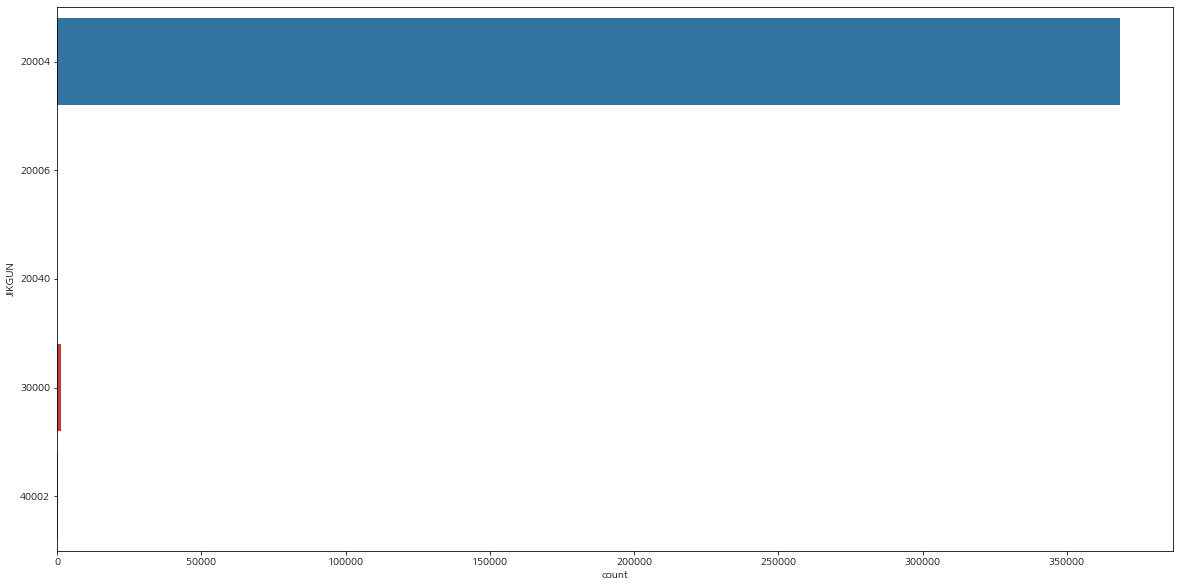

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(y='JIKGUN',data=final)

In [9]:
data_n = data_n.drop(['JIKGUN'],axis=1)

<AxesSubplot:xlabel='count', ylabel='JIKGEUB'>

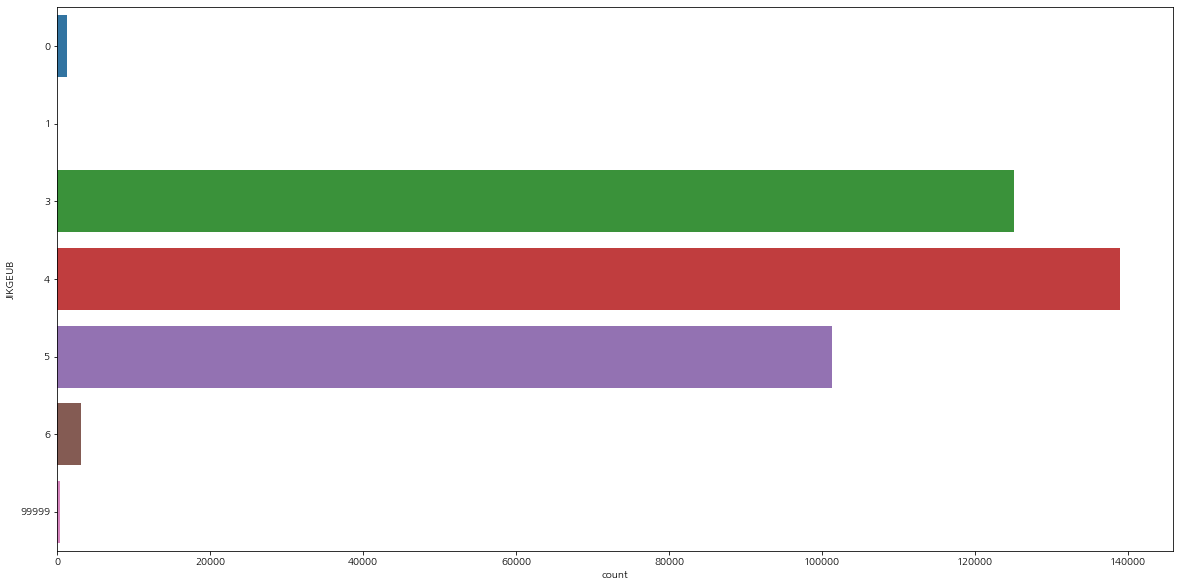

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(y='JIKGEUB',data=final)

In [11]:
data_n = pd.concat([data_n.drop(['JIKGEUB'],axis=1),pd.get_dummies(data_n['JIKGEUB'])], axis=1)

<AxesSubplot:xlabel='JIKWHI', ylabel='count'>

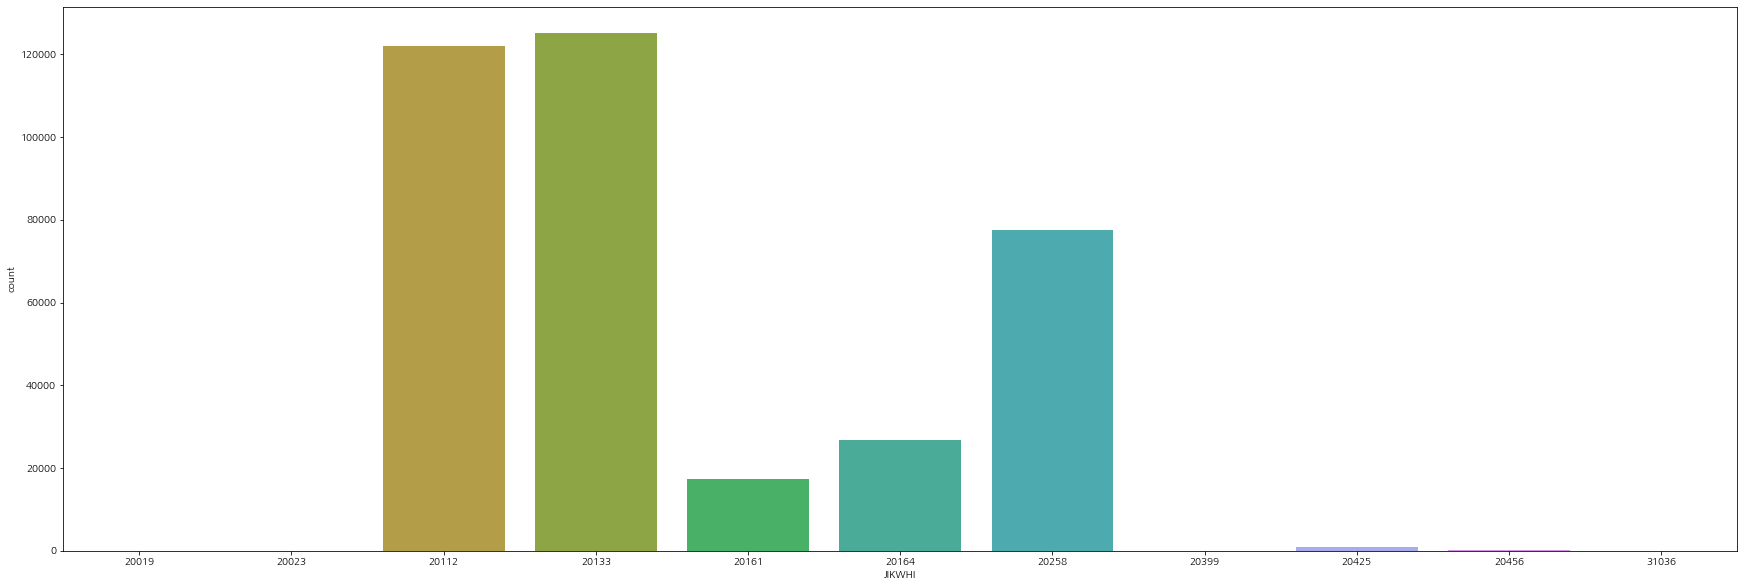

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='JIKWHI',data=final)

In [13]:
data_n = pd.concat([data_n.drop(['JIKWHI'],axis=1),pd.get_dummies(data_n['JIKWHI'])], axis=1)

<AxesSubplot:xlabel='JIKWHI2', ylabel='count'>

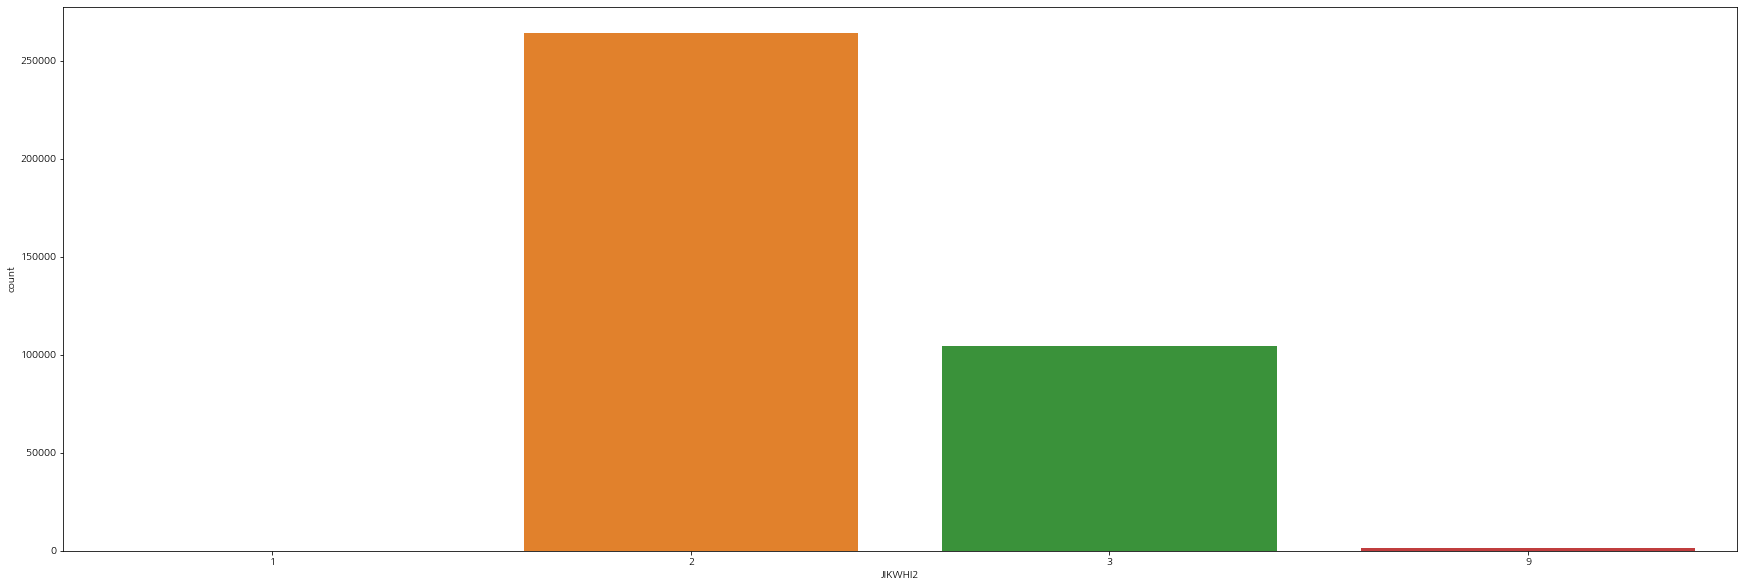

In [14]:
plt.figure(figsize=(30,10))
sns.countplot(x='JIKWHI2',data=final)

In [15]:
data_n = pd.concat([data_n.drop(['JIKWHI2'],axis=1),pd.get_dummies(data_n['JIKWHI2'])], axis=1)

<AxesSubplot:xlabel='JUJKMU_C', ylabel='count'>

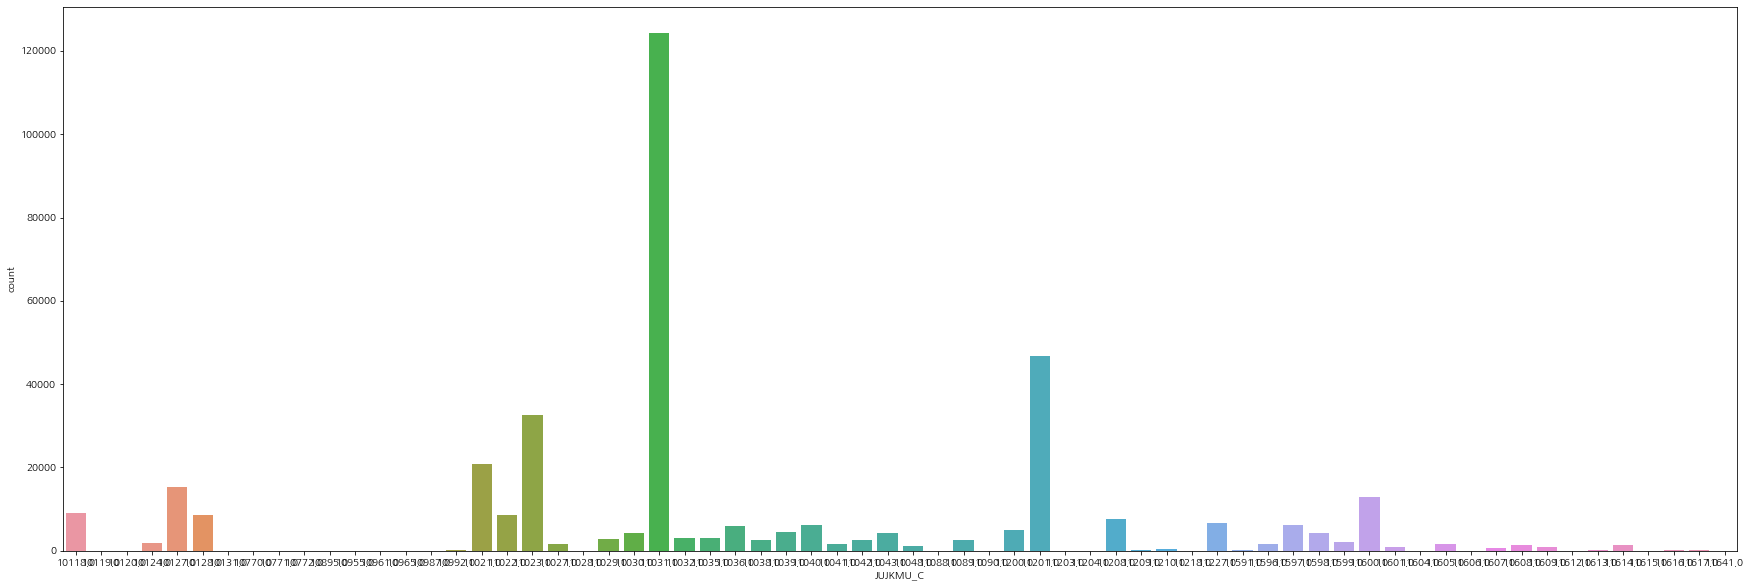

In [16]:
plt.figure(figsize=(30,10))
sns.countplot(x='JUJKMU_C',data=final)

In [17]:
data_n = pd.concat([data_n.drop(['JUJKMU_C'],axis=1),pd.get_dummies(data_n['JUJKMU_C'])], axis=1)

<AxesSubplot:xlabel='JUJKMU_RATE', ylabel='count'>

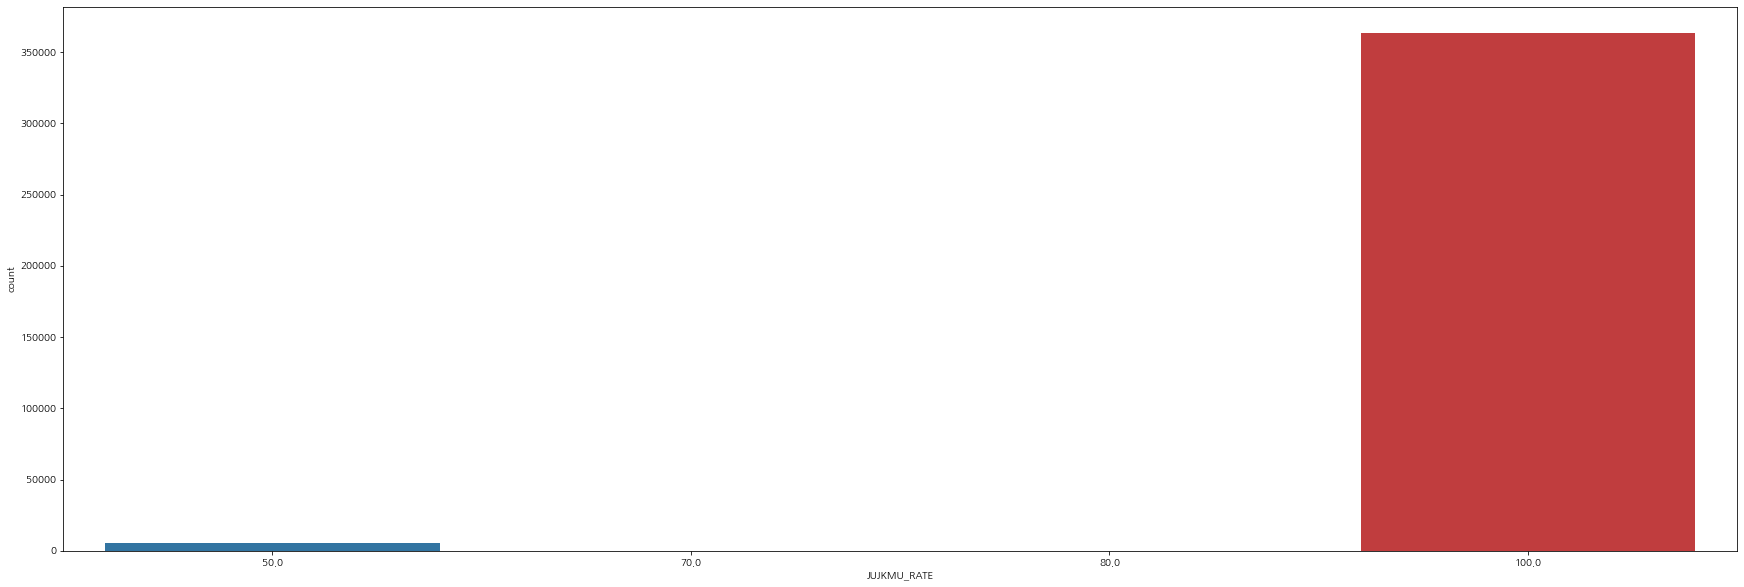

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(x='JUJKMU_RATE',data=final)

In [19]:
data_n = data_n.drop(['JUJKMU_RATE'],axis=1)

<AxesSubplot:xlabel='BUJKMU_C', ylabel='count'>

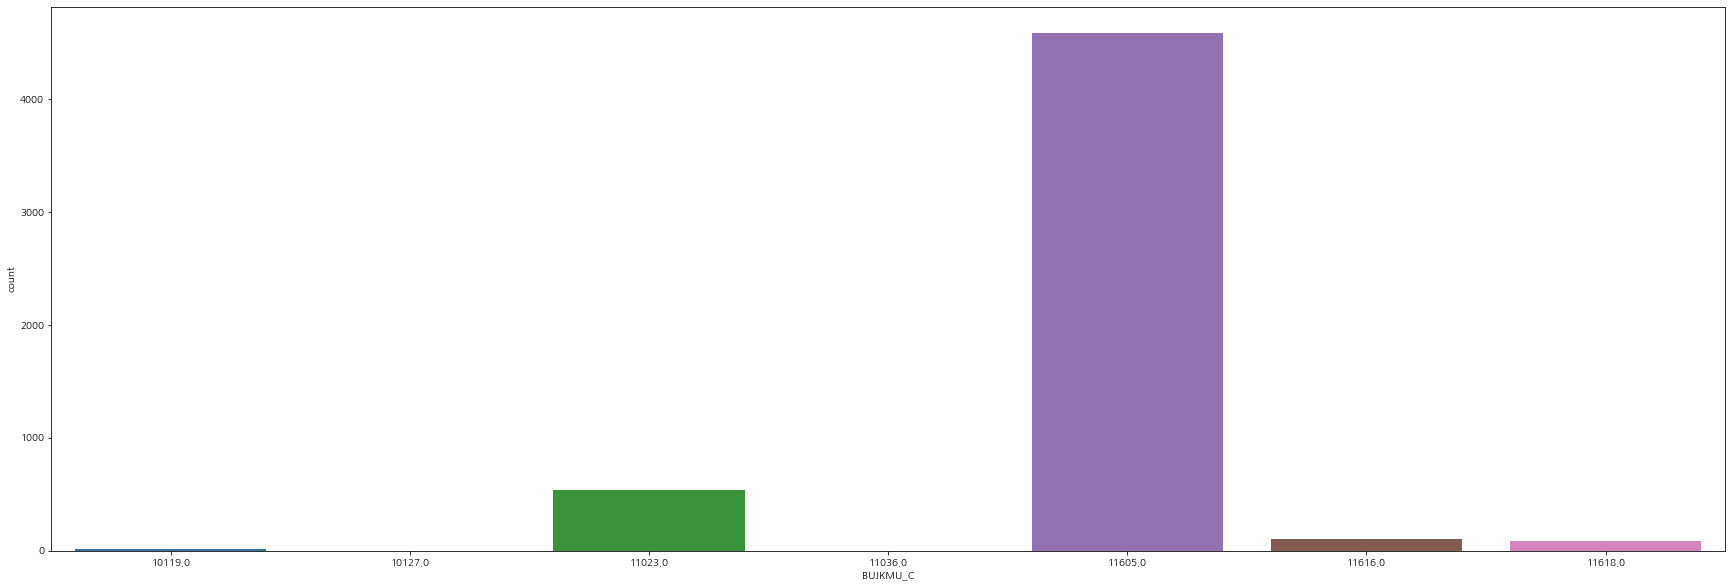

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(x='BUJKMU_C',data=final)

In [21]:
data_n = pd.concat([data_n.drop(['BUJKMU_C'],axis=1),pd.get_dummies(data_n['BUJKMU_C'])], axis=1)

In [22]:
data_n = data_n.drop(['BUJKMU_RATE'],axis=1)

<AxesSubplot:xlabel='JUMJANG_G', ylabel='count'>

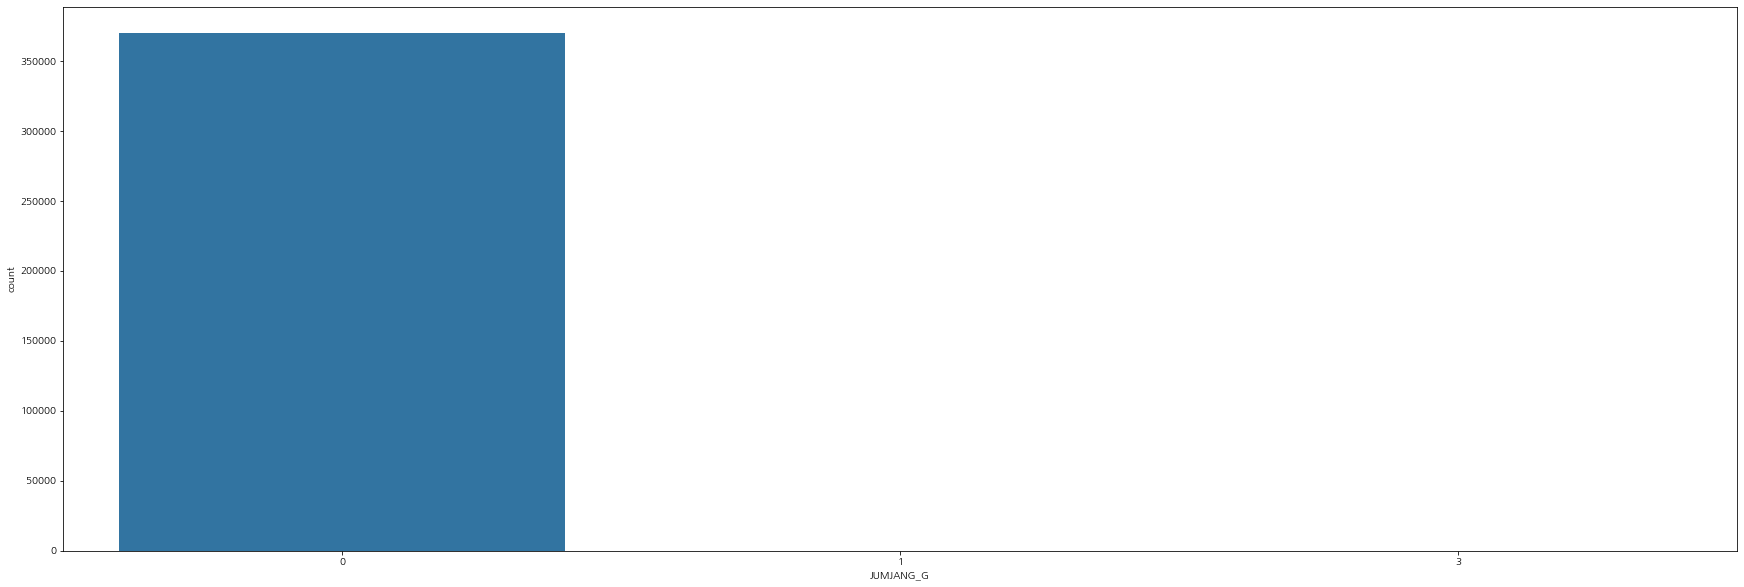

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(x='JUMJANG_G',data=final)

In [24]:
data_n = data_n.drop(['JUMJANG_G'],axis=1)

<AxesSubplot:xlabel='HOBONG'>

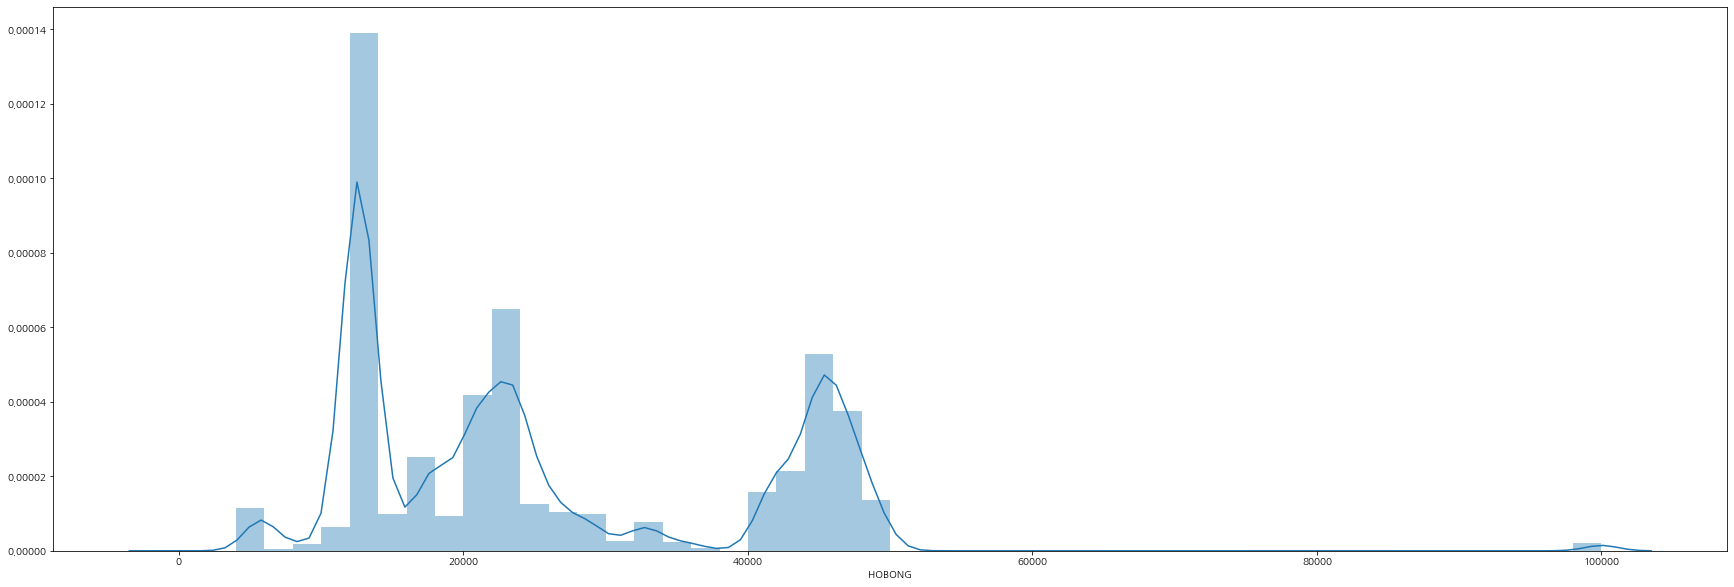

In [25]:
plt.figure(figsize=(30,10))
sns.distplot(final['HOBONG'])

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fitted = mm.fit(final[['HOBONG']])
pd.Series(mm.transform(final[['HOBONG']]).reshape(-1))

0         0.434239
1         0.434239
2         0.434239
3         0.434239
4         0.434239
            ...   
370035    0.453895
370036    0.453895
370037    0.453895
370038    0.453895
370039    0.453895
Length: 370040, dtype: float64

In [27]:
data_n = pd.concat([data_n.drop(['HOBONG'],axis=1),pd.Series(mm.transform(final[['HOBONG']]).reshape(-1))], axis=1)

<AxesSubplot:xlabel='BUIM_ILJA'>

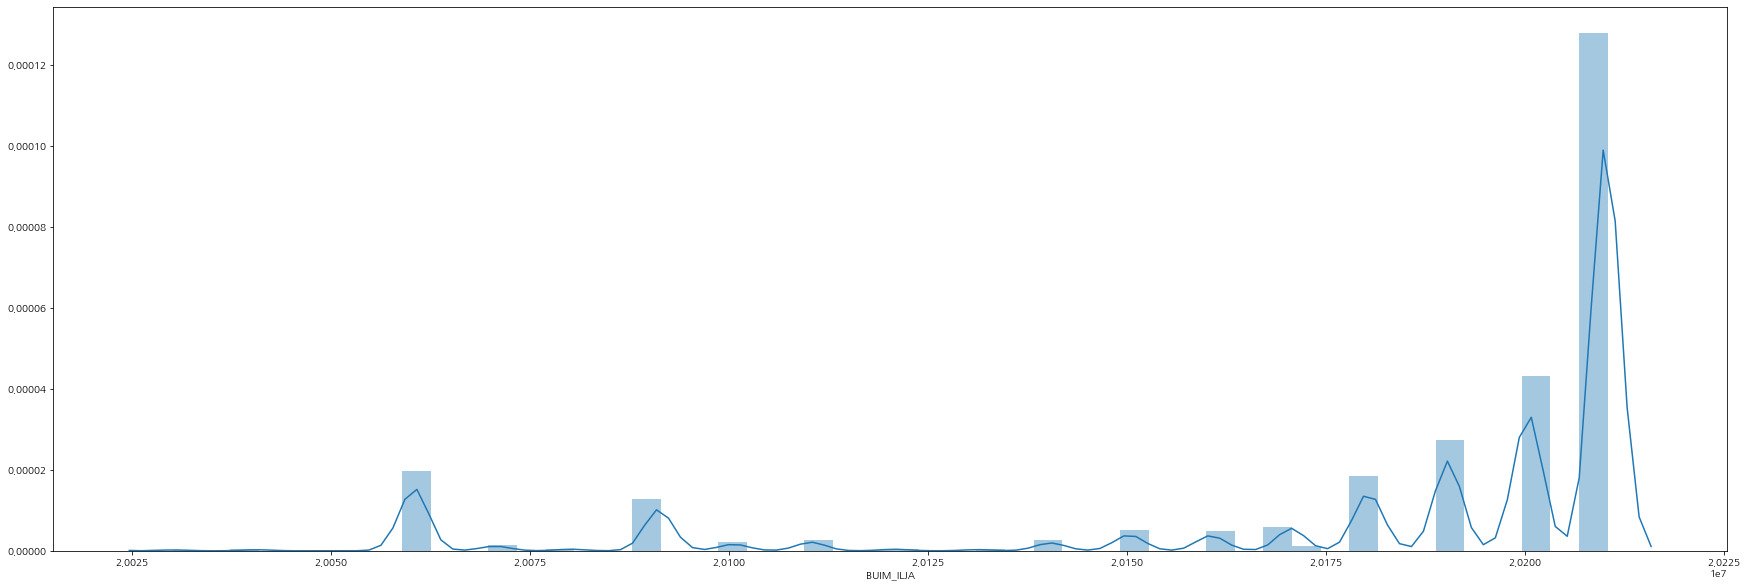

In [28]:
plt.figure(figsize=(30,10))
sns.distplot(final['BUIM_ILJA'])

In [29]:
pd.to_datetime('20201102').value

1604275200000000000

In [30]:
from datetime import datetime
def timediff(t):
    return pd.to_datetime(str(t[0])).value
                            
dd = final[['BUIM_ILJA']].apply(timediff,axis=1)
dd

0         1612137600000000000
1         1612137600000000000
2         1612137600000000000
3         1612137600000000000
4         1612137600000000000
                 ...         
370035    1536278400000000000
370036    1536278400000000000
370037    1536278400000000000
370038    1536278400000000000
370039    1536278400000000000
Length: 370040, dtype: int64

In [31]:
np.array(dd).reshape(-1,1)

NameError: name 'np' is not defined

In [32]:
import numpy as np
mm = MinMaxScaler()
fitted = mm.fit(np.array(dd).reshape(-1,1))
pd.Series(mm.transform(np.array(dd).reshape(-1,1)).reshape(-1))

0         0.990218
1         0.990218
2         0.990218
3         0.990218
4         0.990218
            ...   
370035    0.858089
370036    0.858089
370037    0.858089
370038    0.858089
370039    0.858089
Length: 370040, dtype: float64

In [33]:
data_n = pd.concat([data_n.drop(['BUIM_ILJA'],axis=1)
                    ,pd.Series(mm.transform(np.array(dd).reshape(-1,1)).reshape(-1))], axis=1)

<AxesSubplot:xlabel='COL01', ylabel='count'>

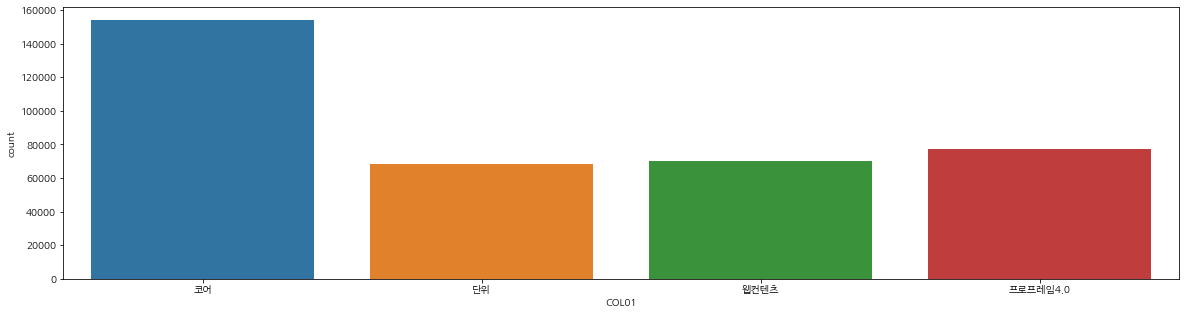

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(x='COL01', data=final)

In [35]:
data_n = pd.concat([data_n.drop(['COL01'],axis=1),pd.get_dummies(data_n['COL01'])], axis=1)

<AxesSubplot:xlabel='count', ylabel='COL02'>

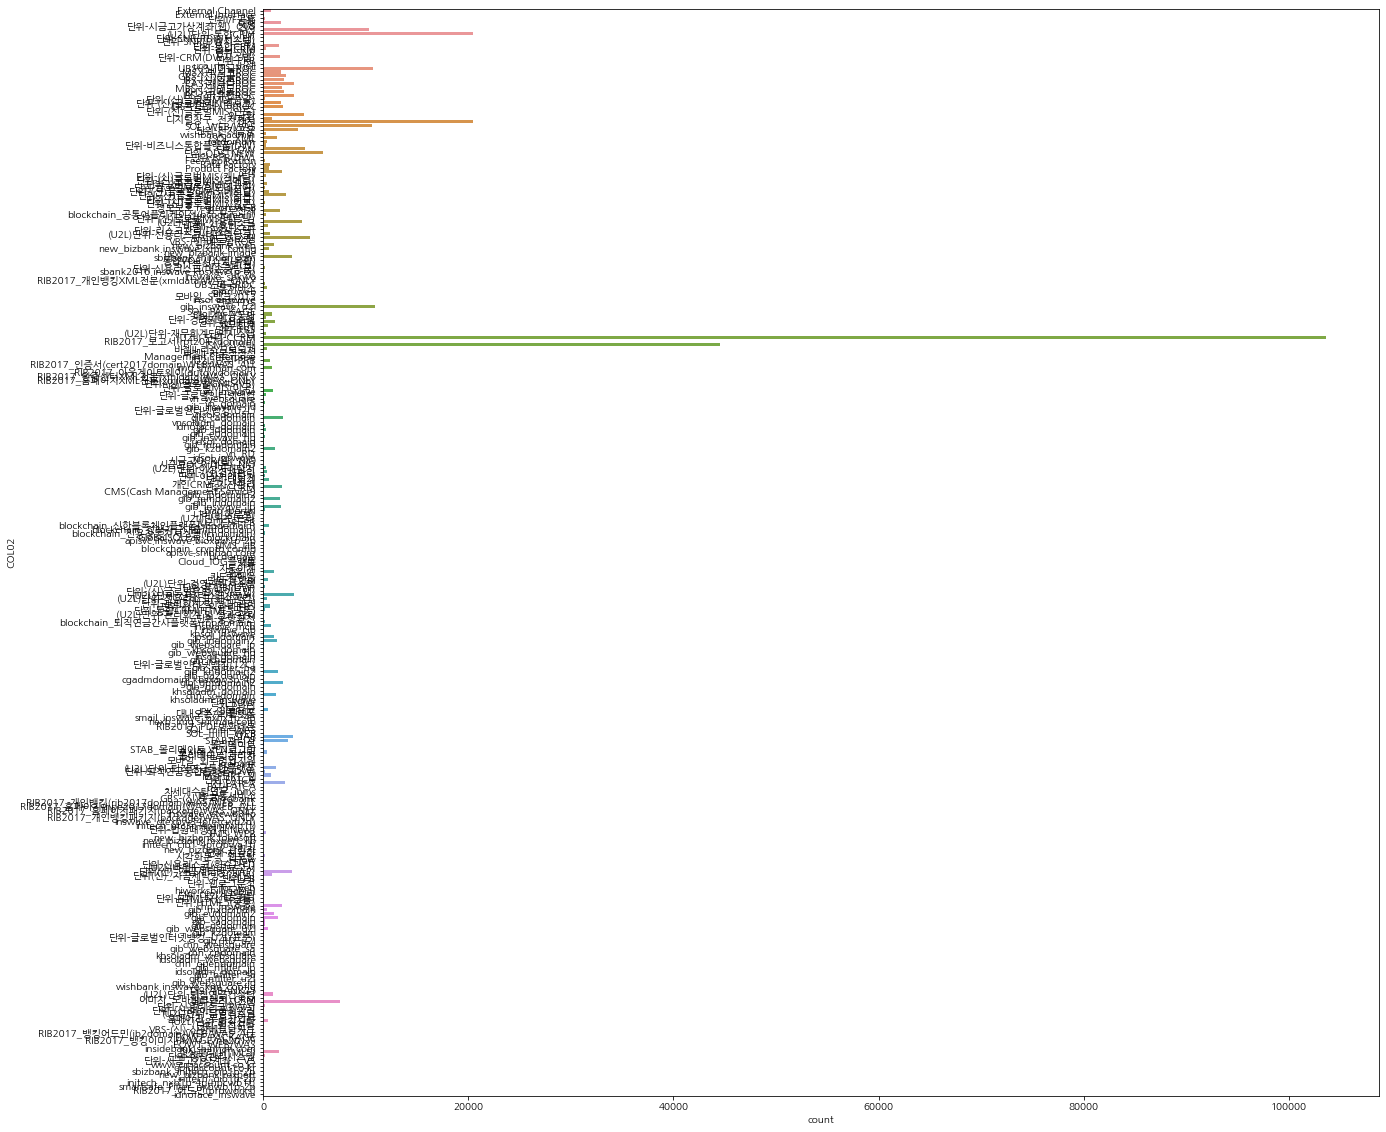

In [36]:
plt.figure(figsize=(20,20))
sns.countplot(y='COL02', data=final)

In [37]:
final.groupby('COL02').size().sort_values(ascending=False)

COL02
(U2L) 단위-CCRM            103604
TSM-신신탁                   44508
(U2L)단위-통합CRM             20491
여신                        20443
gib_inswave_u2l           10878
                          ...  
goldaccount.co.kr             1
chn_opendomain                1
vn_RD                         1
new_bizbank.rexpert           1
RIB2017_어드민(proworks)         1
Length: 283, dtype: int64

In [38]:
final.groupby('COL02').size().sort_values(ascending=False).mean()

1307.1342756183747

In [39]:
xxx = final.groupby('COL02').size().sort_values(ascending=False)
xxx.loc[xxx>1307].index

Index(['(U2L) 단위-CCRM', 'TSM-신신탁', '(U2L)단위-통합CRM', '여신', 'gib_inswave_u2l',
       'UBS-(신)미국ROC', 'SOL_WEB/WAS', '수신', '메타관리시스템', '단위-ODS_NEW', '퇴직연금시스템',
       '단위-DW', '외국환', '(U2L)바젤II-신용리스크', '단위-전자금융', 'IBS-(신)유럽ROC',
       '(U2L)단위-신용리스크(RWA)', 'CAS-캐나다ROC', 'STAB', 'sbizbank.shinhan.com',
       '단위(신)_자금세탁방지(AP)', 'STAB관리자', '단위-(신)글로벌GMIS(일본)', 'GBS-(신)중국ROC',
       '(신)FATCA', 'JBS-(신)일본ROC', 'KHS-크메르ROC', 'IDS-인도네시아ROC',
       'gib_gptdomain2', 'gib_cadomain', '단위-CCRM', '고객', 'chn_inswave',
       'MBS-(신)인도ROC', '단위-(신)글로벌MIS(멕시코)', 'gib_inswave_jp', 'MSX-멕시코ROC',
       '대행', '단위-CRM(DW시스템)', 'IB-업무전체', 'gib_mmdomain2', '형상관리(HTML5)',
       '단위-통합CRM', 'gib_nydomain', 'gib_khdomain2', 'gib_indomain2',
       'SOL_XML'],
      dtype='object', name='COL02')

In [40]:
pd.get_dummies(data_n['COL02'])[xxx.loc[xxx>1307].index]

,(U2L) 단위-CCRM,TSM-신신탁,(U2L)단위-통합CRM,여신,gib_inswave_u2l,UBS-(신)미국ROC,SOL_WEB/WAS,수신,메타관리시스템,단위-ODS_NEW,...,대행,단위-CRM(DW시스템),IB-업무전체,gib_mmdomain2,형상관리(HTML5),단위-통합CRM,gib_nydomain,gib_khdomain2,gib_indomain2,SOL_XML
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370035,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
370036,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
370037,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
370038,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_n = pd.concat([data_n.drop(['COL02'],axis=1),pd.get_dummies(data_n['COL02'])[xxx.loc[xxx>1307].index]], axis=1)

<AxesSubplot:xlabel='count', ylabel='COL03'>

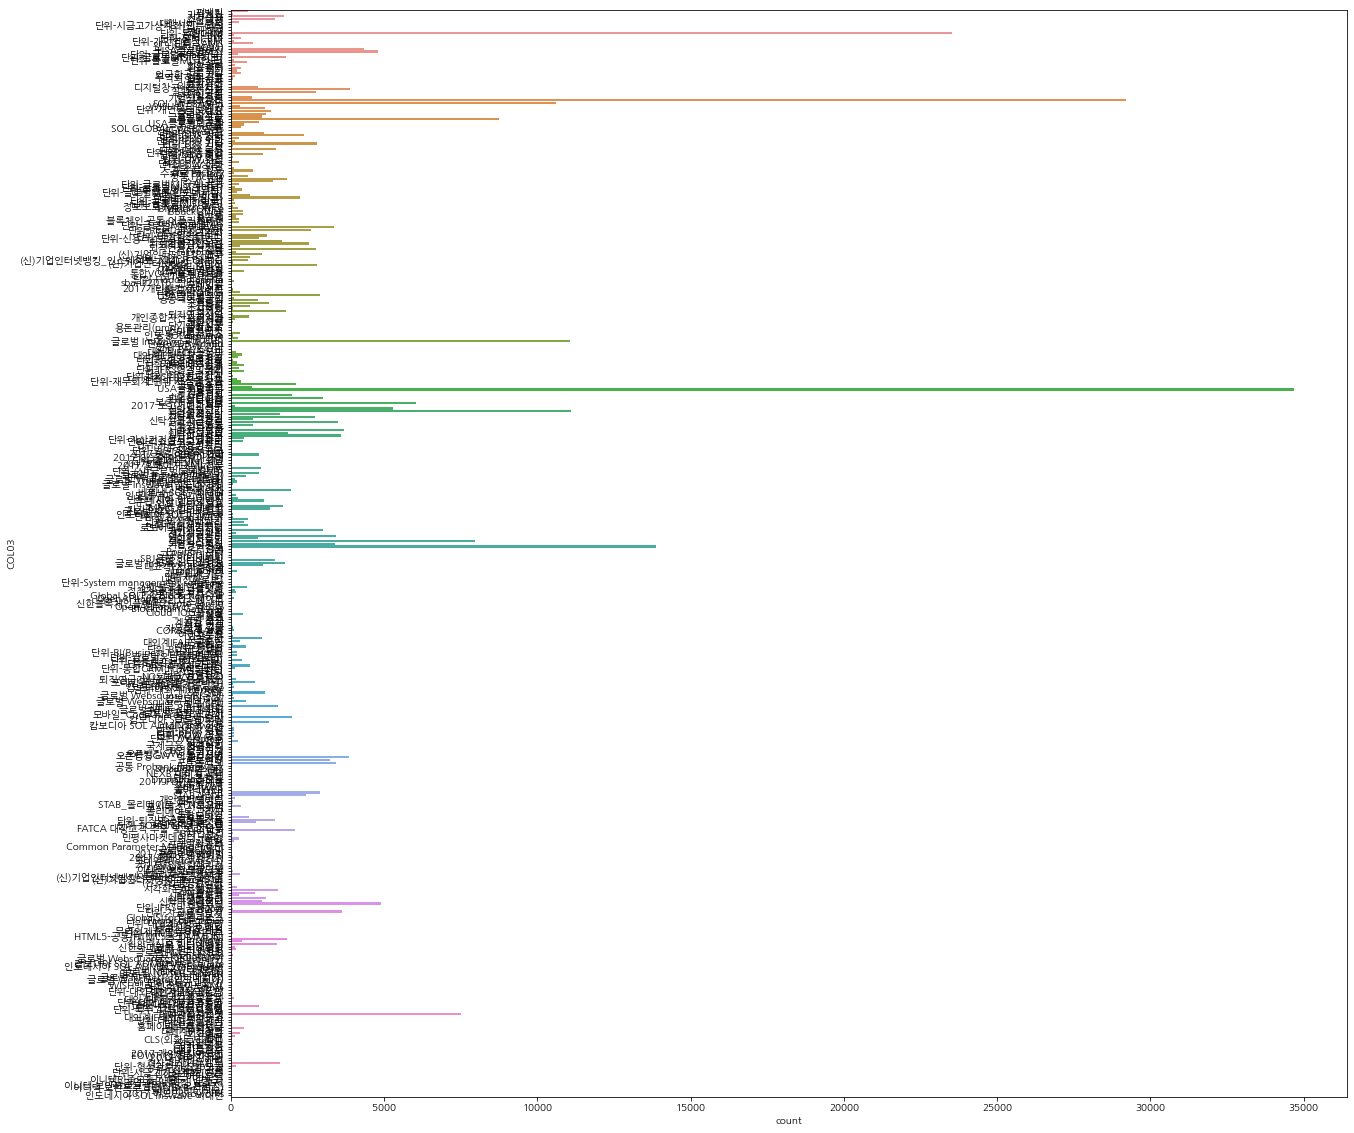

In [42]:
plt.figure(figsize=(20,20))
sns.countplot(y='COL03', data=final)

In [43]:
final.groupby('COL03').size().sort_values(ascending=False).mean()

920.1965174129353

In [44]:
xx = final.groupby('COL03').size().sort_values(ascending=False)
xx.loc[xx>921].index

Index(['신용평가', '사후관리', '단위-통합CRM', '조기경보', '특정금전신탁', '글로벌 Inswave(국내서버)',
       'SOL_WEB/WAS', '글로벌공통', '토탈익스포져', '메타관리시스템', '담보', '신탁채권단기', '신탁주식',
       '글로벌여신', 'USA글로벌여신', '실행 및 상환', '한도관리', '신탁자산통합', '단위-자금세탁방지', '신탁파생상품',
       '신탁공통', '여신이력관리', '포트폴리오', '기업상담지원', '단위-RWA', '부도연체', '개인상담신청',
       '기업상담신청', 'STAB', 'USA글로벌수신', '단위-DW 기타', '기업뱅킹 모바일', '여신공통', '신탁',
       '신탁수익증권', '단위-RiskComponent', '퇴직연금입지급', 'STAB관리자', '단위-ODS 기타',
       '단위-GMS(일본)', '글로벌수신', '신FATCA', '글로벌 포탈', '소호상담신청', '캐나다 인터넷뱅킹',
       '신탁한도관리', '고객', '중국 Inswave', '정기성', '단위-글로벌MIS(멕시코)',
       '글로벌 Inswave(SBJ은행)', '전자금융', 'MMC 인터넷뱅킹', '퇴직연금자산운용', '신탁회계관리',
       '형상관리(HTML5)', '기준가신탁', '크메르 인터넷뱅킹', '뉴욕 인터넷뱅킹', '단위-ODS 공통',
       '단위-퇴직연금통합플랫폼', '인도 인터넷뱅킹', '수납대행', '수신 공통', 'SOL_XML', '카자흐스탄 인터넷뱅킹',
       '중국 SOL', '유동성', '단위-바젤원천데이터', '글로벌자금', '신탁성과관리', '단위-개인인터넷뱅킹',
       'SBJ SOL', '단위-DW 공통', '유럽 신한 인터넷뱅킹', '단위-ODS 여신', '대고객FX/파생상품',
       '(신)기업인터넷뱅킹_업무', '금융 IC', '신탁마켓데이터', '글로벌외국환', 

In [45]:
data_n = pd.concat([data_n.drop(['COL03'],axis=1),pd.get_dummies(data_n['COL03'])[xx.loc[xx>921].index]], axis=1)

<AxesSubplot:xlabel='count', ylabel='COL04'>

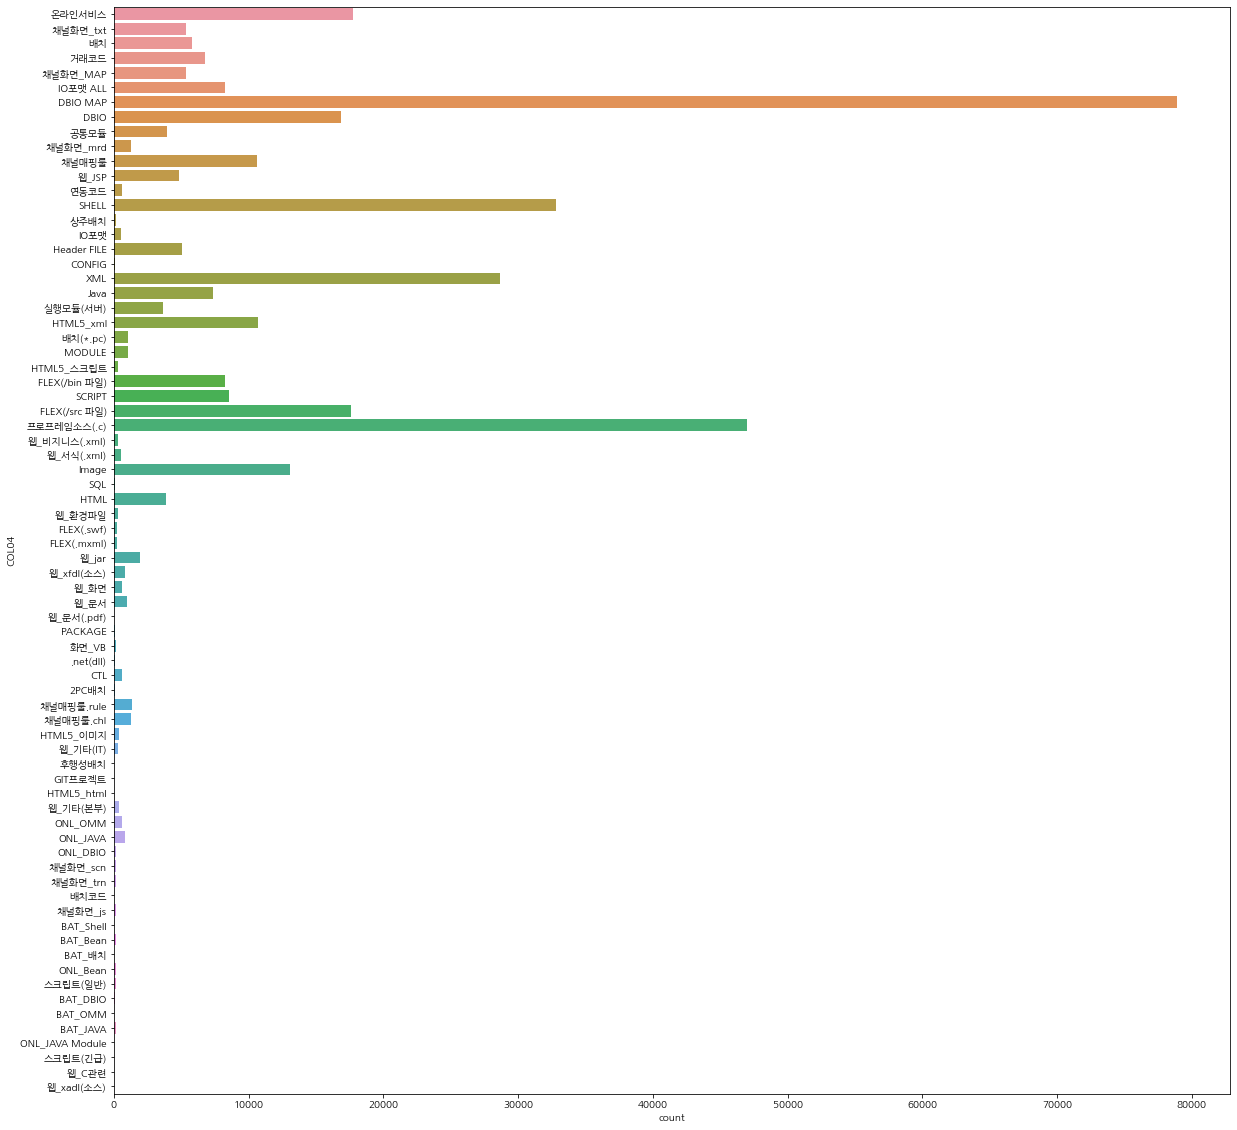

In [46]:
plt.figure(figsize=(20,20))
sns.countplot(y='COL04', data=final)

In [47]:
tmp = data_n.drop(['COL04','COL05','COL08','COL09','COL10','COL11','COL12'
 ,'COL14','COL15','PM행번','PM부서','업무명','프로젝트계획시작일','프로젝트계획종료일','착수일','종료일','이행예정일','이행일'
,'개발의뢰번호','의뢰자행번'],axis=1)

In [48]:
tmp.head()

,JIKWON_NO,61,62,63,64,66,69,507,0,1,...,단위-ODS 여신,대고객FX/파생상품,(신)기업인터넷뱅킹_업무,금융 IC,신탁마켓데이터,글로벌외국환,글로벌MIS,단위-신용리스크(대손충당금),단위-퇴직연금컨설팅,글로벌 Inswave(베트남)
0,BK20101491,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BK20101491,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BK20101491,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BK20101491,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BK20101491,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tmp = tmp.groupby(tmp['JIKWON_NO']).sum()
tmp

,61,62,63,64,66,69,507,0,1,3,...,단위-ODS 여신,대고객FX/파생상품,(신)기업인터넷뱅킹_업무,금융 IC,신탁마켓데이터,글로벌외국환,글로벌MIS,단위-신용리스크(대손충당금),단위-퇴직연금컨설팅,글로벌 Inswave(베트남)
JIKWON_NO,,,,,,,,,,,,,,,,,,,,,
BK06126324,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK06126571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK06126790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK06126995,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK06127258,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BK21200191,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK21200203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BK21501238,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
data_nn = tmp.transpose()
data_nn

JIKWON_NO,BK06126324,BK06126571,BK06126790,BK06126995,BK06127258,BK06128040,BK06128386,BK06128777,BK06129307,BK06130232,...,BK21200130,BK21200149,BK21200157,BK21200165,BK21200180,BK21200191,BK21200203,BK21501238,BK21501718,BK21502323
61,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
62,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
글로벌외국환,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
글로벌MIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
단위-신용리스크(대손충당금),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
단위-퇴직연금컨설팅,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
cormat = data_nn.corr()
cormat

JIKWON_NO,BK06126324,BK06126571,BK06126790,BK06126995,BK06127258,BK06128040,BK06128386,BK06128777,BK06129307,BK06130232,...,BK21200130,BK21200149,BK21200157,BK21200165,BK21200180,BK21200191,BK21200203,BK21501238,BK21501718,BK21502323
JIKWON_NO,,,,,,,,,,,,,,,,,,,,,
BK06126324,1.000000,0.485564,0.480315,0.284256,0.241859,0.162970,0.482825,0.306994,0.403270,0.480305,...,0.246583,0.141622,0.254988,0.141623,0.141604,0.109771,0.141605,0.159611,0.151366,0.152421
BK06126571,0.485564,1.000000,0.653604,0.284894,0.242464,0.163707,0.827539,0.306923,0.552034,0.653525,...,0.108974,0.144213,0.113390,0.144213,0.144210,0.111903,0.144211,0.347087,0.156930,0.157978
BK06126790,0.480315,0.653604,1.000000,0.278752,0.237484,0.163825,0.651886,0.475280,0.549377,0.825201,...,0.101907,0.135682,0.106117,0.135682,0.305711,0.104691,0.135681,0.150105,0.321210,0.321988
BK06126995,0.284256,0.284894,0.278752,1.000000,0.550903,0.544786,0.281184,0.112060,0.605110,0.278441,...,0.092274,0.126941,0.096483,0.287967,0.126973,0.095006,0.126971,0.135538,0.145695,0.146620
BK06127258,0.241859,0.242464,0.237484,0.550903,1.000000,0.413649,0.239386,0.086064,0.191502,0.237189,...,0.068904,0.099586,0.072516,0.099584,0.099620,0.071205,0.099618,0.106133,0.117385,0.118149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BK21200191,0.109771,0.111903,0.104691,0.095006,0.071205,0.131055,0.106405,0.100921,0.076697,0.103638,...,0.561717,0.693649,0.579599,0.554041,0.554102,1.000000,0.693676,0.121707,0.176235,0.177031
BK21200203,0.141605,0.144211,0.135681,0.126971,0.099618,0.170084,0.137641,0.131074,0.105152,0.134395,...,0.543672,0.999999,0.560747,0.669043,0.669121,0.693676,1.000000,0.154517,0.220703,0.221643
BK21501238,0.159611,0.347087,0.150105,0.135538,0.106133,0.002083,0.343365,0.150356,0.120571,0.150191,...,0.118634,0.154559,0.123206,0.154562,0.154514,0.121707,0.154517,1.000000,0.535152,0.348356


In [54]:
cormat.reset_index()

JIKWON_NO,JIKWON_NO,BK06126324,BK06126571,BK06126790,BK06126995,BK06127258,BK06128040,BK06128386,BK06128777,BK06129307,...,BK21200130,BK21200149,BK21200157,BK21200165,BK21200180,BK21200191,BK21200203,BK21501238,BK21501718,BK21502323
0,BK06126324,1.000000,0.485564,0.480315,0.284256,0.241859,0.162970,0.482825,0.306994,0.403270,...,0.246583,0.141622,0.254988,0.141623,0.141604,0.109771,0.141605,0.159611,0.151366,0.152421
1,BK06126571,0.485564,1.000000,0.653604,0.284894,0.242464,0.163707,0.827539,0.306923,0.552034,...,0.108974,0.144213,0.113390,0.144213,0.144210,0.111903,0.144211,0.347087,0.156930,0.157978
2,BK06126790,0.480315,0.653604,1.000000,0.278752,0.237484,0.163825,0.651886,0.475280,0.549377,...,0.101907,0.135682,0.106117,0.135682,0.305711,0.104691,0.135681,0.150105,0.321210,0.321988
3,BK06126995,0.284256,0.284894,0.278752,1.000000,0.550903,0.544786,0.281184,0.112060,0.605110,...,0.092274,0.126941,0.096483,0.287967,0.126973,0.095006,0.126971,0.135538,0.145695,0.146620
4,BK06127258,0.241859,0.242464,0.237484,0.550903,1.000000,0.413649,0.239386,0.086064,0.191502,...,0.068904,0.099586,0.072516,0.099584,0.099620,0.071205,0.099618,0.106133,0.117385,0.118149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,BK21200191,0.109771,0.111903,0.104691,0.095006,0.071205,0.131055,0.106405,0.100921,0.076697,...,0.561717,0.693649,0.579599,0.554041,0.554102,1.000000,0.693676,0.121707,0.176235,0.177031
428,BK21200203,0.141605,0.144211,0.135681,0.126971,0.099618,0.170084,0.137641,0.131074,0.105152,...,0.543672,0.999999,0.560747,0.669043,0.669121,0.693676,1.000000,0.154517,0.220703,0.221643
429,BK21501238,0.159611,0.347087,0.150105,0.135538,0.106133,0.002083,0.343365,0.150356,0.120571,...,0.118634,0.154559,0.123206,0.154562,0.154514,0.121707,0.154517,1.000000,0.535152,0.348356
430,BK21501718,0.151366,0.156930,0.321210,0.145695,0.117385,0.025252,0.147784,0.311478,0.114674,...,0.172233,0.220305,0.178421,0.220283,0.389185,0.176235,0.220703,0.535152,1.000000,0.657345


In [105]:
mapthis = cormat.reset_index().iloc[:,:1].to_dict()['JIKWON_NO']
mapthis

{0: 'BK06126324',
 1: 'BK06126571',
 2: 'BK06126790',
 3: 'BK06126995',
 4: 'BK06127258',
 5: 'BK06128040',
 6: 'BK06128386',
 7: 'BK06128777',
 8: 'BK06129307',
 9: 'BK06130232',
 10: 'BK06130399',
 11: 'BK06130860',
 12: 'BK06132091',
 13: 'BK06132448',
 14: 'BK06132790',
 15: 'BK06132928',
 16: 'BK06132952',
 17: 'BK06133819',
 18: 'BK06134440',
 19: 'BK06137059',
 20: 'BK06137148',
 21: 'BK06137458',
 22: 'BK06137611',
 23: 'BK06138454',
 24: 'BK06140701',
 25: 'BK06142869',
 26: 'BK06143407',
 27: 'BK06143891',
 28: 'BK06144144',
 29: 'BK06144209',
 30: 'BK06144586',
 31: 'BK06145272',
 32: 'BK06145299',
 33: 'BK06145620',
 34: 'BK06145868',
 35: 'BK06146023',
 36: 'BK06146066',
 37: 'BK06146340',
 38: 'BK06146856',
 39: 'BK06148069',
 40: 'BK06148190',
 41: 'BK06150020',
 42: 'BK06150306',
 43: 'BK06150608',
 44: 'BK06151167',
 45: 'BK06151401',
 46: 'BK06151833',
 47: 'BK06152635',
 48: 'BK06153501',
 49: 'BK06154001',
 50: 'BK06154654',
 51: 'BK06155154',
 52: 'BK06155448',
 53

In [109]:
mapthis = dict((y,x) for x,y in mapthis.items())
mapthis

{'BK06126324': 0,
 'BK06126571': 1,
 'BK06126790': 2,
 'BK06126995': 3,
 'BK06127258': 4,
 'BK06128040': 5,
 'BK06128386': 6,
 'BK06128777': 7,
 'BK06129307': 8,
 'BK06130232': 9,
 'BK06130399': 10,
 'BK06130860': 11,
 'BK06132091': 12,
 'BK06132448': 13,
 'BK06132790': 14,
 'BK06132928': 15,
 'BK06132952': 16,
 'BK06133819': 17,
 'BK06134440': 18,
 'BK06137059': 19,
 'BK06137148': 20,
 'BK06137458': 21,
 'BK06137611': 22,
 'BK06138454': 23,
 'BK06140701': 24,
 'BK06142869': 25,
 'BK06143407': 26,
 'BK06143891': 27,
 'BK06144144': 28,
 'BK06144209': 29,
 'BK06144586': 30,
 'BK06145272': 31,
 'BK06145299': 32,
 'BK06145620': 33,
 'BK06145868': 34,
 'BK06146023': 35,
 'BK06146066': 36,
 'BK06146340': 37,
 'BK06146856': 38,
 'BK06148069': 39,
 'BK06148190': 40,
 'BK06150020': 41,
 'BK06150306': 42,
 'BK06150608': 43,
 'BK06151167': 44,
 'BK06151401': 45,
 'BK06151833': 46,
 'BK06152635': 47,
 'BK06153501': 48,
 'BK06154001': 49,
 'BK06154654': 50,
 'BK06155154': 51,
 'BK06155448': 52,
 'B

In [66]:
cormat_m = pd.melt(cormat.reset_index(), id_vars=['JIKWON_NO'])
cormat_m.columns = ['source','x','weight']
cormat_m

,source,x,weight
0,BK06126324,BK06126324,1.000000
1,BK06126324,BK06126324,0.485564
2,BK06126324,BK06126324,0.480315
3,BK06126324,BK06126324,0.284256
4,BK06126324,BK06126324,0.241859
...,...,...,...
186619,BK21502323,BK21502323,0.177031
186620,BK21502323,BK21502323,0.221643
186621,BK21502323,BK21502323,0.348356
186622,BK21502323,BK21502323,0.657345


In [70]:
edge = pd.concat([cormat_m,pd.Series(list(cormat.index)*432, name='target')],axis=1).drop(['x'],axis=1)
edge

,source,weight,target
0,BK06126324,1.000000,BK06126324
1,BK06126324,0.485564,BK06126571
2,BK06126324,0.480315,BK06126790
3,BK06126324,0.284256,BK06126995
4,BK06126324,0.241859,BK06127258
...,...,...,...
186619,BK21502323,0.177031,BK21200191
186620,BK21502323,0.221643,BK21200203
186621,BK21502323,0.348356,BK21501238
186622,BK21502323,0.657345,BK21501718


In [110]:
edge_m = edge.replace({'source':mapthis,'target':mapthis})
edge_m

,source,weight,target
0,0,1.000000,0
1,0,0.485564,1
2,0,0.480315,2
3,0,0.284256,3
4,0,0.241859,4
...,...,...,...
186619,431,0.177031,427
186620,431,0.221643,428
186621,431,0.348356,429
186622,431,0.657345,430


In [120]:
edge_f = edge[(edge['weight']>0.8)&(edge['source']!=edge['target'])]

In [123]:
edge_m.round(2)

,source,weight,target
0,0,1.00,0
1,0,0.49,1
2,0,0.48,2
3,0,0.28,3
4,0,0.24,4
...,...,...,...
186619,431,0.18,427
186620,431,0.22,428
186621,431,0.35,429
186622,431,0.66,430


In [128]:
tri = pd.DataFrame(pd.np.triu(cormat.values)).reset_index()
tri

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,index,0,1,2,3,4,5,6,7,8,...,422,423,424,425,426,427,428,429,430,431
0,0,1.0,0.485564,0.480315,0.284256,0.241859,0.162970,0.482825,0.306994,0.403270,...,0.246583,0.141622,0.254988,0.141623,0.141604,0.109771,0.141605,0.159611,0.151366,0.152421
1,1,0.0,1.000000,0.653604,0.284894,0.242464,0.163707,0.827539,0.306923,0.552034,...,0.108974,0.144213,0.113390,0.144213,0.144210,0.111903,0.144211,0.347087,0.156930,0.157978
2,2,0.0,0.000000,1.000000,0.278752,0.237484,0.163825,0.651886,0.475280,0.549377,...,0.101907,0.135682,0.106117,0.135682,0.305711,0.104691,0.135681,0.150105,0.321210,0.321988
3,3,0.0,0.000000,0.000000,1.000000,0.550903,0.544786,0.281184,0.112060,0.605110,...,0.092274,0.126941,0.096483,0.287967,0.126973,0.095006,0.126971,0.135538,0.145695,0.146620
4,4,0.0,0.000000,0.000000,0.000000,1.000000,0.413649,0.239386,0.086064,0.191502,...,0.068904,0.099586,0.072516,0.099584,0.099620,0.071205,0.099618,0.106133,0.117385,0.118149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693676,0.121707,0.176235,0.177031
428,428,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.154517,0.220703,0.221643
429,429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.535152,0.348356
430,430,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.657345


In [130]:
cormat_d = pd.melt(tri, id_vars=['index'])
cormat_d

,index,variable,value
0,0,0,1.000000
1,1,0,0.000000
2,2,0,0.000000
3,3,0,0.000000
4,4,0,0.000000
...,...,...,...
186619,427,431,0.177031
186620,428,431,0.221643
186621,429,431,0.348356
186622,430,431,0.657345


In [132]:
edge_d = cormat_d[(cormat_d['value']!=0)&(cormat_d['value']!=1)&(cormat_d['value']>=0.7)]
edge_d.columns = ['source','target','weight']
edge_d

,source,target,weight
2593,1,6,0.827539
3890,2,9,0.825201
5185,1,12,0.826606
5190,6,12,0.825910
5617,1,13,0.999594
...,...,...,...
186422,230,431,0.817698
186478,286,431,0.999679
186479,287,431,0.999679
186523,331,431,0.826713


In [133]:
edge_d.round(2).to_csv('edge_und.csv')

In [124]:
edge_m.round(2).to_csv('edge_mapped.csv')

In [121]:
edge_f.to_csv('edge.csv')

In [82]:
pd.Series(cormat.index).to_csv('node.csv')

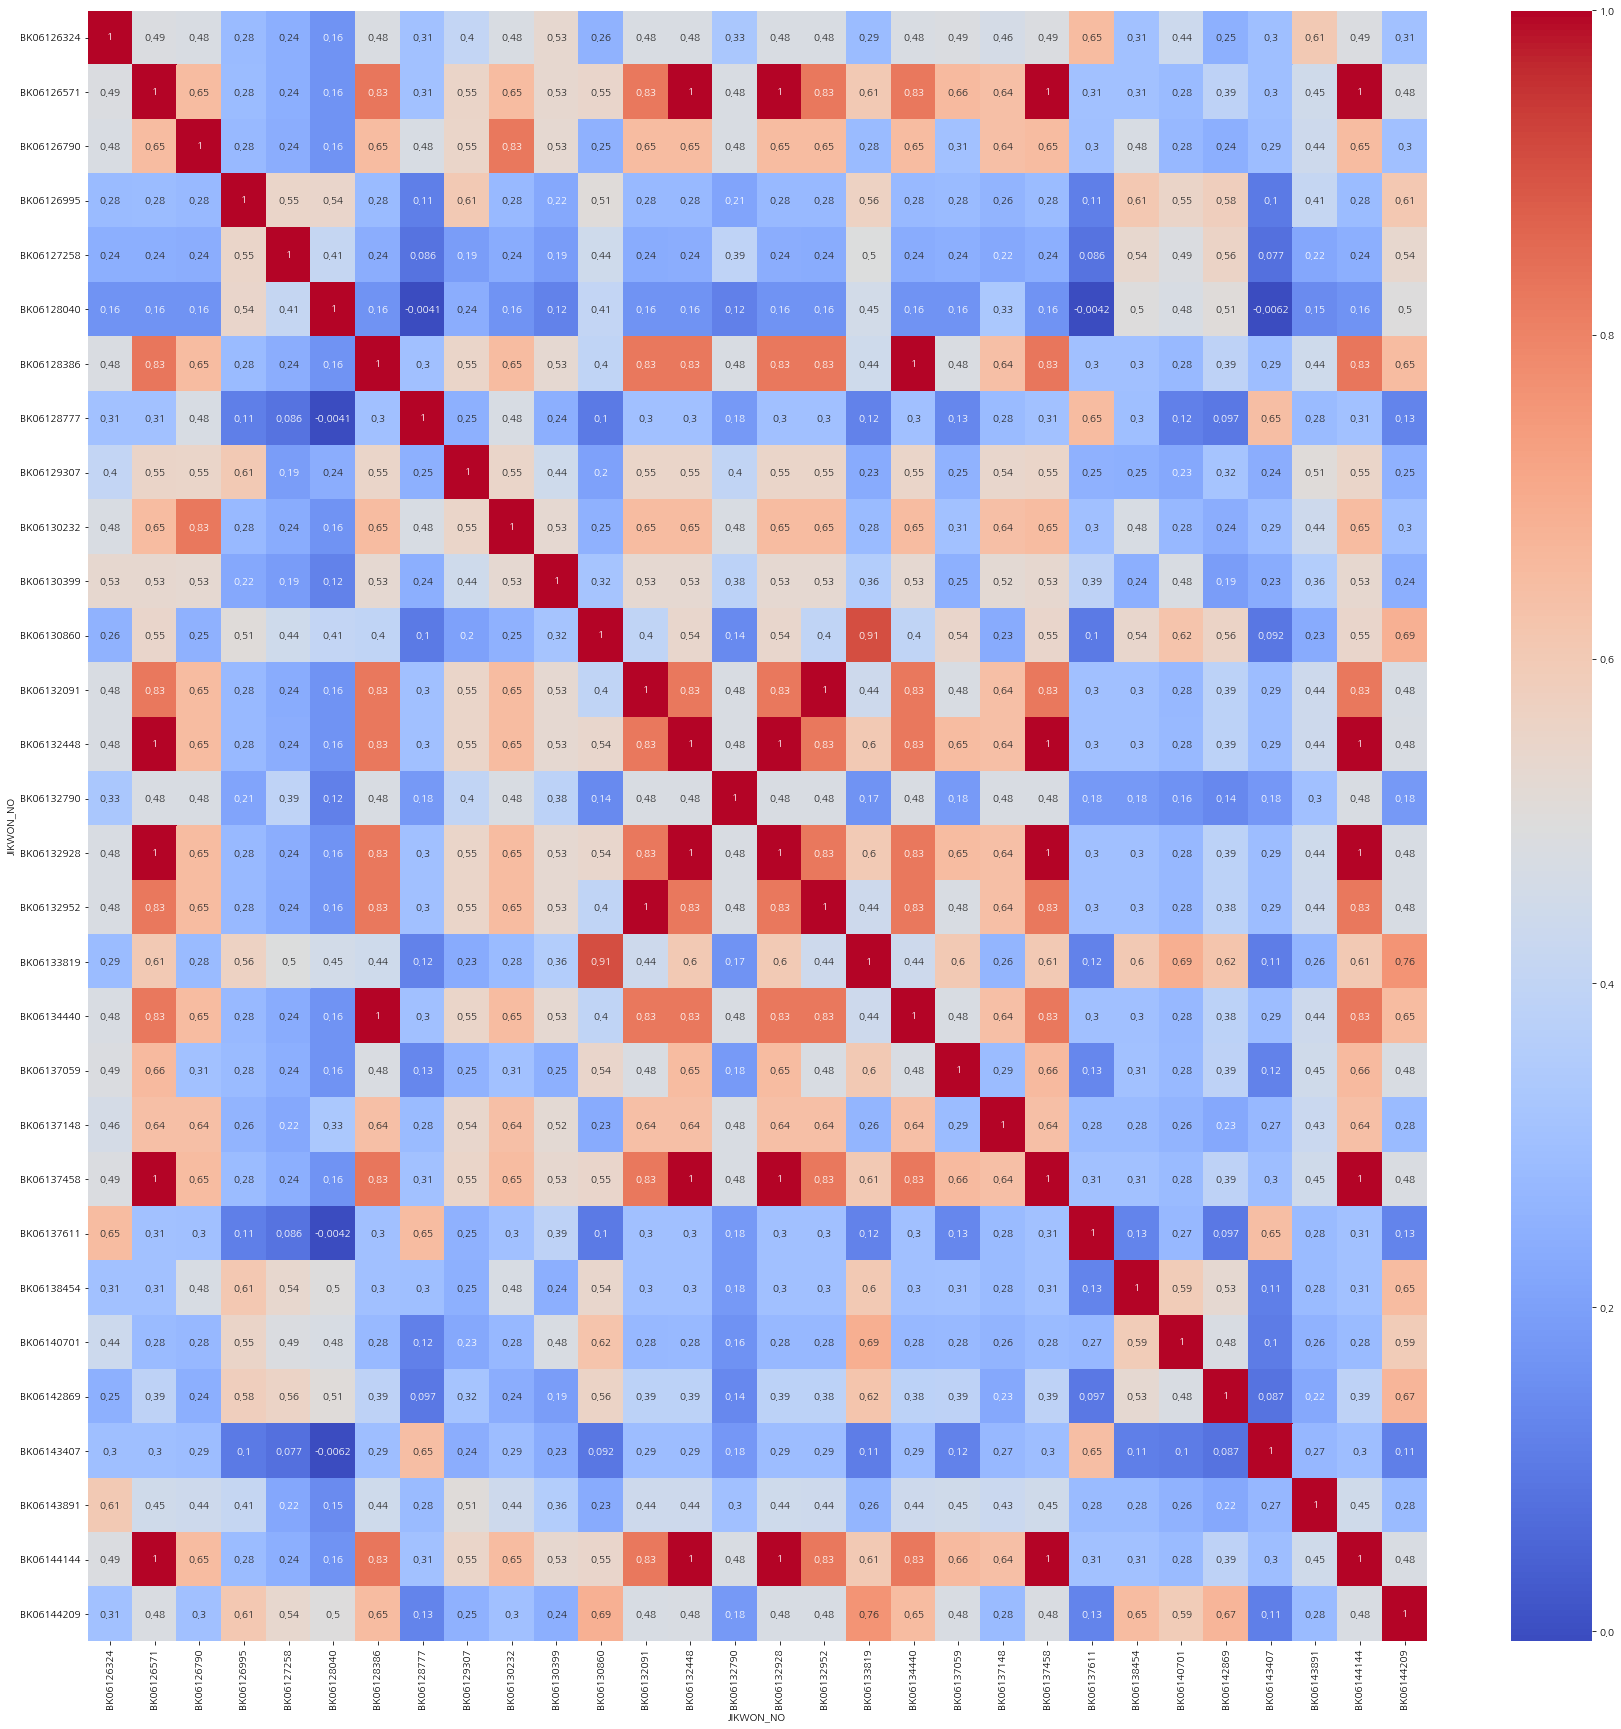

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(30,30))
sns.heatmap(cormat.iloc[:30,:30],cmap='coolwarm',annot=True)
plt.show()